In [168]:
import numpy as np
from scipy.linalg import eigh, cholesky
from scipy.stats import norm
import matplotlib.pyplot as plt
from random import randrange


In [276]:
#создаим класс, которы будет генерировать X, Y матрицы (псевдослучайные) 
class random_corr_arr:
    def __init__(self, n_features=2, n_objects=1000):
        self.n_features = n_features
        self.n_objects = n_objects
    def matrix_x(self):
        np.random.seed(1234)
        w_true = np.random.normal(size=(self.n_features, ))
        X =  np.random.uniform(-7,7, (self.n_objects, self.n_features))
        Y = X.dot(w_true) + np.random.normal(0, 0.5, size=(self.n_objects))
        return X,Y


In [277]:
#создадим X признаков и Y значений 
X = t.matrix_x()[0]
Y = t.matrix_x()[1]


In [280]:
def mserror(X,w,y_pred):
    y = X.dot(w)
    return (sum((y-y_pred)**2))/len(y)

In [401]:
def gd(X,y, learning_rate=0.001, iterations=1000):
    w = np.zeros(X.shape[1])
    w_list = [w.copy()]
    errors = []
    min_weight_dist = 1e-8
    weight_dist = np.inf
    iter_num =0
    
    
    while weight_dist > min_weight_dist and iter_num < iterations:
        new_w = w - 2 * learning_rate * np.dot(X.T, (np.dot(X, w) - Y)) / Y.shape[0]
        weight_dist = np.linalg.norm(new_w - w, ord=2)
    
        w_list.append(new_w.copy())
        
        errors.append(mserror(X, new_w, Y))
    
        iter_num += 1
            
        w = new_w
        # остановим обучение, если ошибка падает меньше 0.0001
        if len(errors)>2 and (errors[-2] - errors[-1]) <=0.0001:
            break
    
    w_list = np.array(w_list)

    return w_list, errors

In [402]:
ttt = np.array([1,2,3,4,5,6,7,8])
ttt[-1]

8

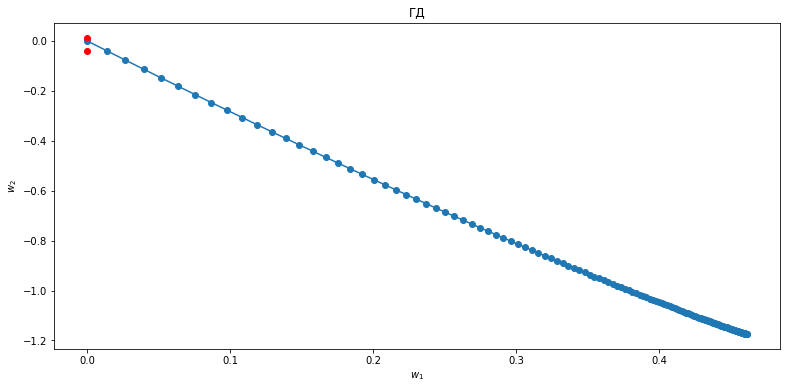

In [403]:
plt.figure(figsize=(13, 6))
plt.title('ГД')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(gd(X,Y)[0][:, 0], gd(X,Y)[0][:, 1])
plt.scatter(gd(X,Y)[0][0], gd(X,Y)[0][1], c='r')
plt.plot(gd(X,Y)[0][:, 0], gd(X,Y)[0][:, 1])

Text(0, 0.5, 'MSE')

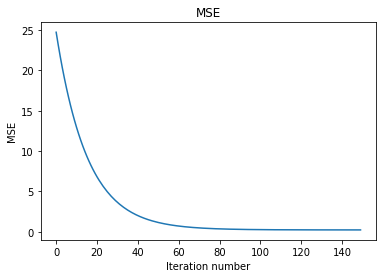

In [404]:
plt.plot(range(len(gd(X,Y)[1])), gd(X,Y)[1])
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')